In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


<h2 align='center' style='color:blue'>Outlier Detection and Removal Using IQR</h2>

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [3]:
df = pd.read_csv("/kaggle/input/weight-height/weight-height.csv")
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


**Histgram for weights**

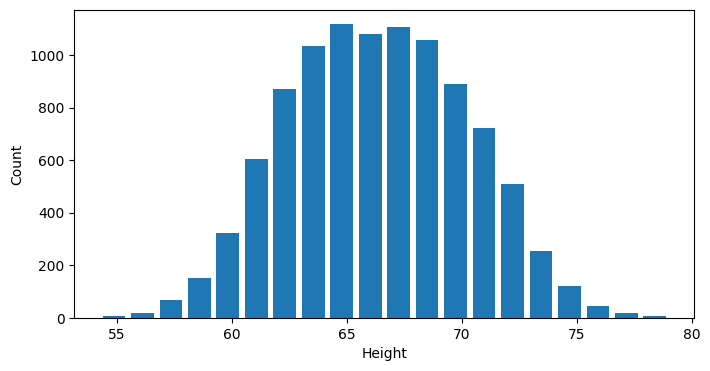

In [4]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

**Detect outliers based on weight**

In [5]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [6]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [7]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [8]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [9]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


**Detect outliers based on height**

In [10]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [11]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [12]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [13]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
